# Project 2
## B-IT Pattern Recognition



Presented on 07-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import scipy.spatial as ss
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.kdTreeCK as kd_rex
import pattrex.KNearestNeighbor as knn_rex


from pattrex.demo_helper import read_whdata

In [2]:
# Read data
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)

# removing outliers
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)

# unknown
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hn = HW_new[0, :]
wn = HW_new[1, :]

In [3]:
qx = np.random.uniform(3, 5, 60)
qx = np.hstack((qx, np.random.uniform(-5, -0.5, 40)))
qy = np.abs(qx) + np.random.uniform(0, 1.0, 100)
qx = np.hstack((qx, np.array([1, 2, 3, 5, 12])))
qy = np.hstack((qy, np.array([11, 3.5, 2.0, 10, 21])))

qu = np.array([1.1, 2.2, -3.3, -1.1])

## Task 2.1
### Ordinary Least Squares Regression

- We are assuming that Weight is a function of Height

- We are assuming that the function is an nth degree polynomial

- We use `numpy.linalg.lstsq(...)` to do the job for us
    
    + If doing *manually*, one can use `numpy.linalg.pinv(...)` to calculate the Moore-Penrose pseudo-inverse

In [4]:
def demo_1(x, y, u, degrees, title, padding=50):
    
    # fit polynomial of degrees 1...10
    results = []
    for degree in range(1, max(degrees)+1):
        results.append(
            fit_rex.fit_polynomial_nplstsq(x, y, degree
                                           , x_pad=padding
                                           , X_unknown=u))
        
    # # pretty print and plot results for [1, 5, 10] ###########
    coeffs = []
    coeffs_string = "{}: "
    
    preds = []
    preds_string = "{}: "
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    XY_ = np.vstack((x, y))
    xmin, ymin = XY_.min(axis=1)
    xmax, ymax = XY_.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]

    # plot data
    plt_rex.plot2d(XY_, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data",
                   title=title)

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    for degree in degrees:
        res = results[degree-1]
        
        coeffs.append(res[0])
        
        preds.append(res[2][1])
        preds_string += "{:4.3} |"
        
        line = res[1]
        pred = res[2]
        
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch='-',
                      show=False, axs=axs,
                      plotlabel=str(degree))
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch='o',
                      show=False, axs=axs,
                      plotlabel=str(degree)+" pred")
        
    print("Coefficients")
    print("\n\n".join("{}".format(c) for c in coeffs))
    print()
    print("Predictions " + str(degrees))
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

Coefficients
[-209.32503027    1.61805916]

[ -2.42736271e+02   2.00365675e+00  -1.11060527e-03]

[  1.45372950e+02   5.00648642e+03  -1.15279840e+02   9.94128981e-01
  -3.80603682e-03   5.45891635e-06]

[  1.30258110e-06   9.54928046e-05   5.52169250e-03   1.90340817e-01
  -4.38414360e-03   3.78208524e-05  -1.44853576e-07   2.07836521e-10]

[  3.39741629e-19   1.17900058e-11  -9.63490518e-15   2.89518900e-13
   2.13966507e-11   1.23047796e-09   4.24710787e-08  -9.78013259e-10
   8.43625378e-12  -3.23109114e-14   4.63624155e-17]

Predictions [1, 2, 5, 7, 10]
168.0: 62.5 |62.5 |58.8 |58.4 |58.0 |
172.0: 69.0 |69.0 |69.7 |69.5 |69.5 |
167.0: 60.9 |60.9 |56.1 |55.7 |55.5 |


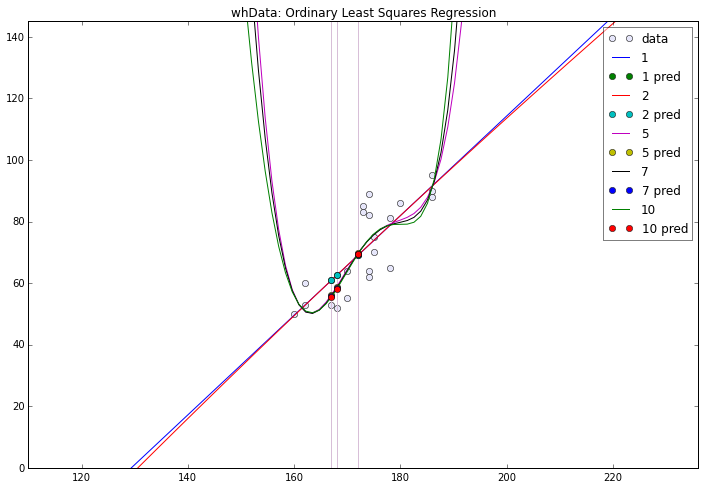

In [5]:
demo_1(hn, wn, hu, [1, 2, 5, 7, 10]
      , "whData: Ordinary Least Squares Regression")

### for some noisy data for $y=mod(x)$

Coefficients
[ 3.90776435  0.28446556]

[ 2.35922054  0.03866472  0.12796995]

[  2.45229762e+00   1.42985454e-01   9.58961159e-02  -5.42497418e-03
   1.86806613e-03  -1.05763052e-04]

[  3.46952680e+00   1.27122834e+00  -4.97691396e-02  -1.65924161e-01
   1.12341616e-02   5.32723079e-03  -2.53137574e-04  -1.41358697e-05]

[  5.59710978e+00   4.73075178e+00  -8.03540383e-01  -1.58678616e+00
   1.38141362e-01   1.85416544e-01  -1.31104462e-02  -9.04593068e-03
   6.59524992e-04   1.56882733e-04  -1.25323526e-05]

Predictions [1, 2, 5, 7, 10]
1.1: 4.22 |2.56 |2.72 |4.61 |8.18 |
2.2: 4.53 |3.06 |3.21 |4.76 |4.79 |
-3.3: 2.97 |3.63 |3.48 |3.68 |3.77 |
-1.1: 3.59 |2.47 |2.42 |2.24 |1.43 |


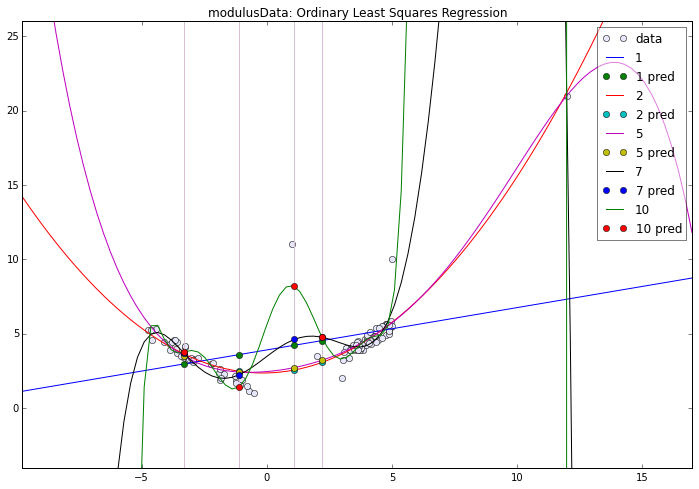

In [6]:
demo_1(qx, qy, qu, [1, 2, 5, 7, 10]
       , "modulusData: Ordinary Least Squares Regression"
       , padding=5)

More, later with Task 2.3

## Task 2.2
### Conditional Expectation from a Bivariate Gaussain

- We used the equations from the slides for fitting a Bivariate Gaussian

$$
\begin{align*}
\mathbf{E} \left[w \mid h = h_0 \right] &= 
\int w 
\mathcal{N} \left(w \mid \mu_{w \mid h=h_0}, \sigma^2_{w \mid h=h_0} \right) dw \\
&= \mu_{w \mid h=h_0}
\end{align*}
$$

    where

$$
\begin{align*}
\mu_{w \mid h=h_0} &= \mu_{w} + \rho \frac{\sigma_w}{\sigma_h}(h_0 - \mu_h) \\
\sigma^2_{w \mid h=h_0} &= \sigma^2_w (1-\rho^2) \\
\rho &= \frac{cov(h, w)}{\sigma_h \sigma_w}
\end{align*}
$$

- We used `numpy.cov(...)` to calculate the covariance 
    
    + by default, the normalization is by `N-1`.
    
    + for MLE estimate, use `ddof=0`
    
    + we used the default, but standard-deviation is still biased

- for the correlation coefficient $\rho$, one can also use `numpy.corrcoef(...)`


In [7]:
def demo_2(x, y, u, title, ddof=None, padding=50):
    XY = np.vstack((x, y))
    res = fit_rex.fit_multivariate_normal_dist(XY, ddof=ddof
                                               , padding=padding
                                               , get_pdf=True
                                               , X_unknown=u
                                               , X_unknown_dim=0)
    coeff = res[0]
    line = res[1]
    pred = res[2]
    xypdf = res[3]
    
    preds = []
    preds_string = "{}: "

    preds.append(pred[1])
    preds_string += "{:4.3} |"
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    xmin, ymin = XY.min(axis=1)
    xmax, ymax = XY.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]

    # plot data
    plt_rex.plot2d(XY, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data",
                  title=title)

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')

    plt_rex.plot2d(np.vstack(line), colwise_data=True,
                  hatch='-',
                  show=False, axs=axs,
                  plotlabel="cond_exp")
    
    plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                  hatch='o',
                  show=False, axs=axs,
                  plotlabel="pred")
        
    axs.contour(*xypdf)

    print("Coefficients")
    print("\n".join("{} {}".format(*c) for c 
                    in zip(["mean\n", "covariance\n", "corr\n"], coeff)))
    print()
    print("Predictions")
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

    

Coefficients
mean
 [ 173.57142857   71.52380952]
covariance
 [[  55.05714286   89.08571429]
 [  89.08571429  219.46190476]]
corr
 0.8104414767618634

Predictions
168.0: 62.5 |
172.0: 69.0 |
167.0: 60.9 |


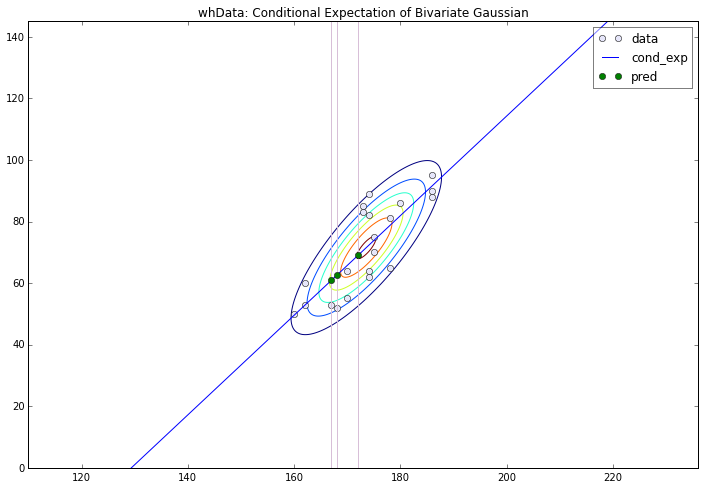

In [8]:
demo_2(hn, wn, hu
      , "whData: Conditional Expectation of Bivariate Gaussian")

- As expected, the conditional expectation gives a straight line through the mean

- **But**, why is it not cutting through the center evenly?
    
    + is it because of the *still* biased standard deviations?

### for some noisy data for $y=mod(x)$

Coefficients
mean
 [ 1.49984     4.33441718]
covariance
 [[ 12.85459151   3.65668855]
 [  3.65668855   4.70390146]]
corr
 0.4702509958051518

Predictions
1.1: 4.22 |
2.2: 4.53 |
-3.3: 2.97 |
-1.1: 3.59 |


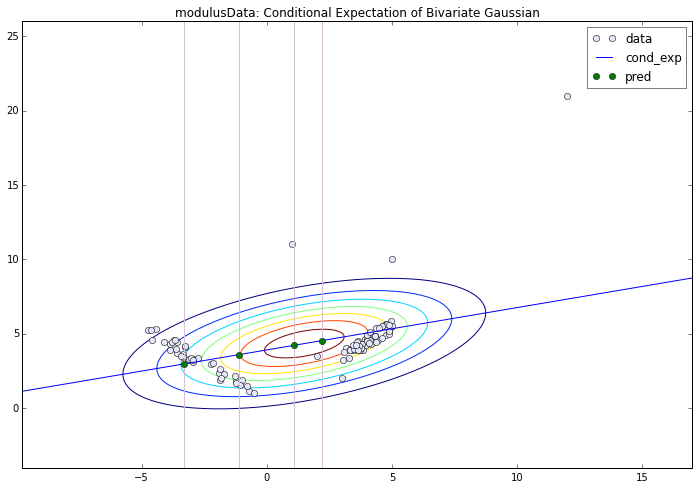

In [9]:
demo_2(qx, qy, qu
       , "modulusData: Conditional Expectation of Bivariate Gaussian"
       , padding=5)

## Task 2.3
### Bayesian Parameter Estimation

- We tried two methods, using equations from the lecture slides

    1. Find the Maximum A Posteriori Estimate of the coefficients, and use the dot product
    2. Use the expectation of the conditional probability of the weights

### $\mathbf{w}_{MAP}$ as Regularized Least Squares

We used the equation:
$$
\begin{align*}
\mathbf{w}_{MAP} &= {argmax}_{\mathbf{w}} \, p(\mathbf{w} \mid D) \\
&= \left(\mathbf{X}^T \mathbf{X} + \frac{\sigma^2}{{\sigma_{0}}^2} \mathbf{I} \right) ^{-1} \, \mathbf{X}^T \mathbf{y}
\end{align*}
$$


Which is a case of ***Regularized Least Squares***

- We used `scipy.sparse.linalg.lsmr(...)` for this

    + It is not exactly needed, since the dataset is so small
    


- $\sigma_{0}^2 = 3$ was given

- we chose $\sigma^2 = var(\mathbf{y})$

    + similar to how `sklearn.linear_model.BayesianRidge()` does
    
    + also because this variance will be *corrected* while calculating the parameters for the conditional probability of the weights

### Expectation of the conditional probability

Assuming that the observed weights are normally distributed about the polynomial :
$$
y(x) = \sum^{d}_{j=0} w_j x^j
$$


we used the equations from the slides:
$$
\mathbb{E}[y \mid x=x_0 , D] = \mathbf{\mu}^T \mathbf{x_0}
$$


where 
$$
\begin{align*}
\mu &= \frac{1}{\sigma^2} \mathbf{\Lambda}^{-1} \mathbf{X}^T \mathbf{y} \\
\mathbf{\Lambda} &= \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \frac{1}{{\sigma_0}^2} \mathbf{I}
\end{align*}
$$

#### Comparing results for degree = 5

In [10]:
def demo_3(x, y, u, degree, title, padding=50):
    XY = np.vstack((x, y))
    
    res_man_lsmr = \
        fit_rex.fit_polynomial_bayesian(x, y, degree
                                       , sig2=None, sig2_0=3.0
                                       , use_lsmr=True, use_pinv=False
                                       , padding=padding, get_pdf=False
                                       , X_unknown=u)
        
    res_man_pinv = \
        fit_rex.fit_polynomial_bayesian(x, y, degree
                                       , sig2=None, sig2_0=3.0
                                       , use_lsmr=True, use_pinv=True
                                       , padding=padding, get_pdf=False
                                       , X_unknown=u)
        
    res_skl = \
        fit_rex.fit_polynomial_bayesian_skl(x, y, degree
                                           , padding=padding
                                           , X_unknown=u)
        
    res_lstsq = \
        fit_rex.fit_polynomial_nplstsq(x, y, degree
                                      , x_pad=padding
                                      , X_unknown=u)
        
    res_multi_gauss = \
        fit_rex.fit_multivariate_normal_dist(XY, ddof=None
                                             , padding=padding
                                             , get_pdf=False
                                             , X_unknown=u
                                             , X_unknown_dim=0)
        
    labels = [
        "dot_coeff"
        , "cond_exp_inv"
        , "cond_exp_pinv"
        , "sklearn"
        , "lstsq"
        , "multi_gauss"
    ]
    
    coeffs = [
        res_man_lsmr[0]
        , res_skl[0]
        , res_lstsq[0]
    ]
    
    lines = [
        res_man_lsmr[1][1]
        , res_man_lsmr[1][0]
        , res_man_pinv[1][0]
        , res_skl[1][0]
        , res_lstsq[1]
        , res_multi_gauss[1]
    ]
    
    preds = [
        res_man_lsmr[2][1]
        , res_man_lsmr[2][0]
        , res_man_pinv[2][0]
        , res_skl[2][0]
        , res_lstsq[2]
        , res_multi_gauss[2]
    ]
    
    predsw = [
        res_man_lsmr[2][1][1]
        , res_man_lsmr[2][0][1]
        , res_man_pinv[2][0][1]
        , res_skl[2][0][1]
        , res_lstsq[2][1]
        , res_multi_gauss[2][1]
    ]
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    xmin, ymin = XY.min(axis=1)
    xmax, ymax = XY.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]
    
    # plot data
    plt_rex.plot2d(XY, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data",
                  title=title)

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    colors = ['r', 'g', 'b', 'k', 'm', 'y']
    for label, line, pred, c in zip(labels, lines, preds, colors):
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch=c+'-',
                      show=False, axs=axs,
                      plotlabel=label)
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch=c+'o',
                      show=False, axs=axs,
                      plotlabel=label+" preds")
        
    
    coeff_string = "{}: " + "".join("{:5.5} |" 
                                    for ci in range(len(coeffs)))
    preds_string = "{}: " + "".join("{:4.3} |" 
                                    for pi in range(len(predsw)))
    
    print("\n### DEGREE = {} ###############"\
          "###################\n".format(degree))
    print("Coefficients\n" + 
          str(["Bayesian inv", "sklearn", "lstsq"]))
    print("\n".join(coeff_string.format(i, *c) 
                    for i, c in enumerate(zip(*coeffs))))
    print()
    print("Predictions\n" + str(labels))
    print("\n".join(preds_string.format(*p) for p in zip(u, *predsw)))


### DEGREE = 5 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 4.5666e-16 |15.974 |145.37 |
1: 6.4147e-14 |-8.584e-09 |5006.5 |
2: 8.4604e-12 |-1.4678e-06 |-115.28 |
3: 9.9334e-10 |-0.00012551 |0.99413 |
4: 8.7598e-08 |1.4368e-06 |-0.003806 |
5: -5.4888e-11 |-3.7582e-09 |5.4589e-06 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
168.0: 62.4 |61.3 |62.4 |62.4 |58.8 |62.5 |
172.0: 68.4 |68.6 |69.1 |69.0 |69.7 |69.0 |
167.0: 61.0 |59.6 |60.8 |60.8 |56.1 |60.9 |


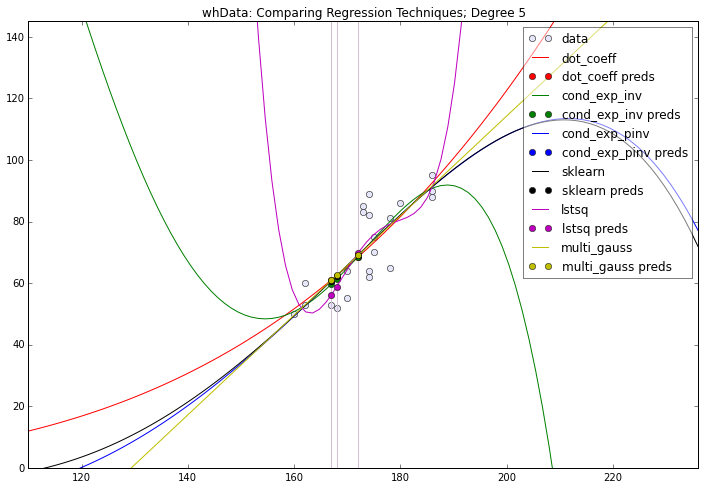

In [11]:
demo_3(hn, wn, hu, 5
      , "whData: Comparing Regression Techniques; Degree 5")

### for some noisy data for $y=mod(x)$


### DEGREE = 5 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 0.33199 |2.9148 |2.4523 |
1: 0.006211 |0.00097467 |0.14299 |
2: 0.41703 |0.001558 |0.095896 |
3: -0.011976 |0.007675 |-0.005425 |
4: -0.0091327 |0.0054449 |0.0018681 |
5: 0.00068566 |-0.0004352 |-0.00010576 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
1.1: 0.815 |2.39 |2.39 |2.94 |2.72 |4.22 |
2.2: 2.06 |3.01 |3.01 |3.11 |3.21 |4.53 |
-3.3: 3.93 |3.56 |3.56 |3.47 |3.48 |2.97 |
-1.1: 0.831 |2.15 |2.15 |2.91 |2.42 |3.59 |


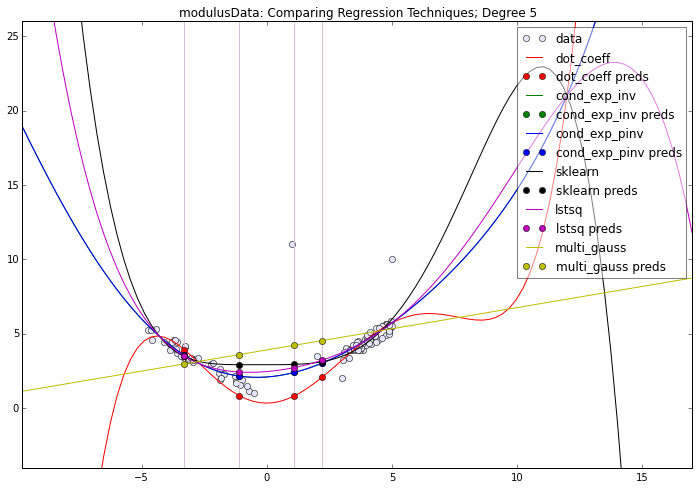

In [12]:
demo_3(qx, qy, qu, 5
       , "modulusData: Comparing Regression Techniques; Degree 5"
       , padding=5)


### DEGREE = 2 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 2.2508 |2.3686 |2.3592 |
1: 0.037112 |0.036337 |0.038665 |
2: 0.13191 |0.12758 |0.12797 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
1.1: 2.45 |2.49 |2.49 |2.56 |2.56 |4.22 |
2.2: 2.97 | 3.0 | 3.0 |3.07 |3.06 |4.53 |
-3.3: 3.56 |3.59 |3.59 |3.64 |3.63 |2.97 |
-1.1: 2.37 | 2.4 | 2.4 |2.48 |2.47 |3.59 |


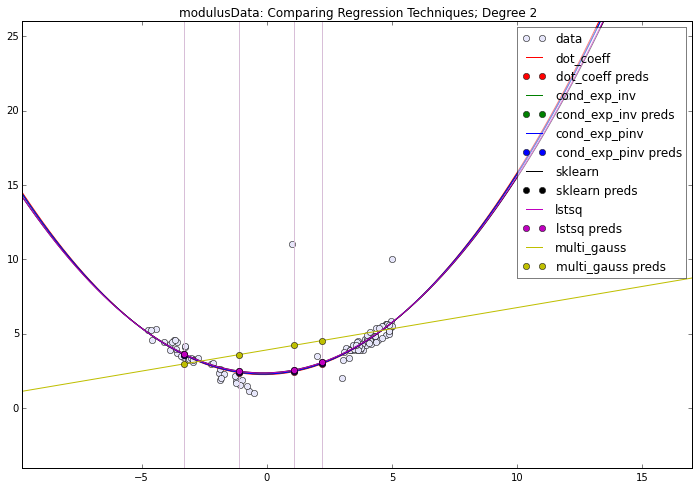

In [13]:
demo_3(qx, qy, qu, 2 
       , "modulusData: Comparing Regression Techniques; Degree 2"
       , padding=5)

### Comparing the approaches

- **Ordinary Least Squares**

    + has tendency to overfit with complexity of model
    
    
- **conditional expectation of Bivariate Gaussian**

    + Assumes the parameters of the model are fixed, and the samples represent them
    
    + worked fine for `whData.dat` (maybe), but is not a right model for ***every*** problem

### Comparing the approaches

- $w_{MAP}$
    
    + This is regularized least squares 
    
    + still has tendency to overfit the observations when complexity of the model is increased
    
        * even though it worked quite fine for `whData.dat` (maybe)
        
- **Bayesian Regression**

    + using `numpy.linalg.inv(...)` or `numpy.linalg.pinv(...)` for $\Lambda^{-1}$ may or may not coincide with the the results of `sklearn`
    
        * `sklearn` assumes the priors for $\sigma^2$ and ${\sigma_0}^2$ to be gamma distributions
        
        * `sklearn` results cannot be assumed to be correct, if our model is wrong
        
    + which one is correct?
    
    
$$ \mu = \frac{1}{\sigma^2} \mathbf{\Lambda}^{-1} \mathbf{X}^T \mathbf{y}$$

## Task 2.4
### Nearest Neighbor Classifier

### Objectives

1. Determine the recognition accuracy (percentage of correctly classified data points) of KNN classifier on `K=1,3,5`

2. Determine the overall run time for computing the 1-nearest neighbor of every data in `data2-test.dat`.

In [14]:
def demo_4_read():
    dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

    data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

    x = np.array([d[0] for d in data])#x
    y = np.array([d[1] for d in data])#y
    lable = np.array([d[2] for d in data])#label

    X = np.vstack((x, y, lable))  # data is going to be column-wise
    X.shape

    # split
    X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
    
    print("\n ### TRAIN DATA ###################################\n")
    print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])
    
    return (x, y, X, X_pos, X_neg)


def demo_4_plot(x, y, X, X_pos, X_neg):
    # plotting
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)

    # limits for the axes
    X_ = np.vstack((x, y))  # only the measurements; data is col-wise
    xmin, ymin = X_.min(axis=1)
    xmax, ymax = X_.max(axis=1)

    xlim = [xmin-25, xmax+25]  # purely for looks
    ylim = [ymin-25, ymax+25]

    plt_rex.plot2d(X_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
                  show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
    plt_rex.plot2d(X_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
                   plotlabel="negtive", title="Train Data")


 ### TRAIN DATA ###################################

Positive : 128 ; Negative : 128


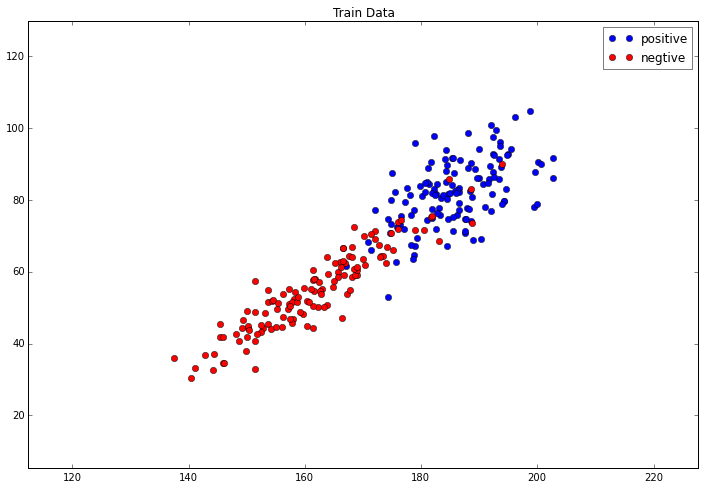

In [15]:
res = demo_4_read()
demo_4_plot(*res)

In [16]:
def demo_4_read_test():
    dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

    data = np.loadtxt('data/data2-test.dat', dtype=dt, comments='#', delimiter=None)

    x_t = np.array([d[0] for d in data])#x
    y_t = np.array([d[1] for d in data])#y
    lable_t = np.array([d[2] for d in data])#label

    X_t = np.vstack((x_t, y_t, lable_t))  # data is going to be column-wise
    X_t.shape

    # split
    X_t_pos, X_t_neg = pre_rex.split_data(X_t, True, 2, [1.0, -1.0])
    
    print("\n ### TEST DATA ###################################\n")
    print("Positive :", X_t_pos.shape[1], "; Negative :", X_t_neg.shape[1])
    
    return (x_t, y_t, X_t, X_t_pos, X_t_neg)


def demo_4_plot_test(x, y, x_t, y_t, X_t, X_t_pos, X_t_neg):
    # plotting
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)

    # limits for the axes
    X_t_ = np.vstack((x, y))  # only the measurements; data is col-wise
    xmin, ymin = X_t_.min(axis=1)
    xmax, ymax = X_t_.max(axis=1)

    xlim = [xmin-25, xmax+25]  # purely for looks
    ylim = [ymin-25, ymax+25]

    plt_rex.plot2d(X_t_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
                  show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
    plt_rex.plot2d(X_t_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
                   y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
                   plotlabel="negtive", title="Test Data")



 ### TEST DATA ###################################

Positive : 48 ; Negative : 48


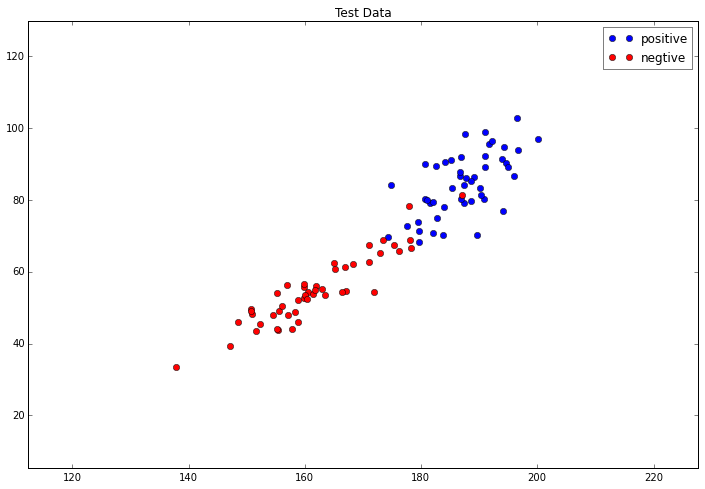

In [17]:
res_test = demo_4_read_test()
demo_4_plot_test(res[0], res[1], *res_test)

### Use the nearest neighbor from Train Data to predict

- First write a test function to test 3 differnet implementations

    + **Method 0**: Run the nearest neighbor k times, for small k
    
    + **Method 1**: Use the method from Pr's paper
    
    + **Method 2**: Adoption based on Pr's paper, instead of all members, we sort partially

In [18]:
def k_nearest_neighbors_smallk(X, q, k):
    inds=nearest_neighbor_method3(X, q)
    a_inds = np.array(inds)
    X=np.delete(X, inds, axis=1)
    for i in range(k-1):
        inds=nearest_neighbor_method2(X, q)
        a_inds=np.append(a_inds,inds)#remember to assign a pointer to new array. the return value is a pointer
        if i!=k-1:
            X=np.delete(X, inds, axis=1)
    return a_inds


def k_nearest_neighbors(X, q, k):
    X = X.T
    sorted_inds = np.argsort(np.sum((X - q)**2, axis=1))
    return sorted_inds[:k]


def k_nearest_neighbors_par(X, q, k):
    X=X.T
    sorted_inds = np.argpartition(np.sum((X - q)**2, axis=1), k-1)
    return sorted_inds[:k]


def recoAccurKNN(train, test, k, method):
    hit=0
    for i in range(test.shape[1]):
        if method==0:
            inds = knn_rex.k_nearest_neighbors_smallk(train[0:2,:],test[0:2,i],k)
        elif method==1:
            inds = knn_rex.k_nearest_neighbors(train[0:2,:],test[0:2,i],k)
        elif method==2:
            inds = knn_rex.k_nearest_neighbors_par(train[0:2,:],test[0:2,i],k)
        if np.multiply(np.sum(train[2,inds]),test[2,i])>0:#if the KNN votes is the same sign as lable on test data.
            hit+=1
    return (hit/test.shape[1])

In [19]:
def demo_4_1(X, X_t):
    i=1
    while i <=5:
        for j in range(3):
            start = timeit.default_timer()
    #         for k in range(2):
            reco = recoAccurKNN(X,X_t,i,j)
            stop = timeit.default_timer()
            print("Accuracy on k =",i,", method =",j,":","{0:.4f}".format(reco)," Time:",stop-start)
        i=i+2

#### Experiment 2.4.1
- Run the Accuracy Test on k = 1,3,5
- Test with 3 methods
- Record the time

In [20]:
demo_4_1(res[2], res_test[2])

Accuracy on k = 1 , method = 0 : 0.8854  Time: 0.010118992009665817
Accuracy on k = 1 , method = 1 : 0.8854  Time: 0.005959512025583535
Accuracy on k = 1 , method = 2 : 0.8854  Time: 0.005033520981669426
Accuracy on k = 3 , method = 0 : 0.8958  Time: 0.017771890037693083
Accuracy on k = 3 , method = 1 : 0.8958  Time: 0.0042293940205127
Accuracy on k = 3 , method = 2 : 0.8958  Time: 0.0037597300251945853
Accuracy on k = 5 , method = 0 : 0.9375  Time: 0.024289132037665695
Accuracy on k = 5 , method = 1 : 0.9375  Time: 0.006400421028956771
Accuracy on k = 5 , method = 2 : 0.9375  Time: 0.0036597360158339143


#### Discussion 2.4.1
- In which we can see that method 2 and 3 are nearly good.

- Then we run this test with higher K on method 2 and 3.

- And to get a stable result we repeat 10 times on both method

#### Experiment 2.4.2
- We run the experiments 100 times on method 2 and 3

- Test with small K up to 25

In [21]:
def demo_4_2(X, X_t):
    i=1
    repeat = 100
    while i <=25:
        for j in range(1,3):
            start = timeit.default_timer()
            for k in range(repeat):
                reco = recoAccurKNN(X,X_t,i,j)
            stop = timeit.default_timer()
            print("Accuracy on k =",i,", method =",j,":","{0:.4f}".format(reco)," Time:",stop-start)
        i=i+2

In [22]:
demo_4_2(res[2], res_test[2])

Accuracy on k = 1 , method = 1 : 0.8854  Time: 0.45327673404244706
Accuracy on k = 1 , method = 2 : 0.8854  Time: 0.38959394895937294
Accuracy on k = 3 , method = 1 : 0.8958  Time: 0.3985279049957171
Accuracy on k = 3 , method = 2 : 0.8958  Time: 0.36176972201792523
Accuracy on k = 5 , method = 1 : 0.9375  Time: 0.38571932999184355
Accuracy on k = 5 , method = 2 : 0.9375  Time: 0.3700371909653768
Accuracy on k = 7 , method = 1 : 0.9167  Time: 0.39496570598566905
Accuracy on k = 7 , method = 2 : 0.9167  Time: 0.3475179829983972
Accuracy on k = 9 , method = 1 : 0.9271  Time: 0.421245550038293
Accuracy on k = 9 , method = 2 : 0.9271  Time: 0.36627145495731384
Accuracy on k = 11 , method = 1 : 0.9479  Time: 0.43179321399657056
Accuracy on k = 11 , method = 2 : 0.9479  Time: 0.37437912402674556
Accuracy on k = 13 , method = 1 : 0.9583  Time: 0.38942308095283806
Accuracy on k = 13 , method = 2 : 0.9583  Time: 0.3551352189970203
Accuracy on k = 15 , method = 1 : 0.9479  Time: 0.41294416895834

#### Discussion 2.4.2
- On average, when K is small, Partial sort is better than sort.
- Observed that accuracy stablized at around 95%

#### Experiment 2.4.3
- Use method 3 to run k up to the limit

In [23]:
def demo_4_3(X, X_t):
    i=int(1)
    recoList=[]
    kList=[]
    tList=[]
    while i <=255:
        start = timeit.default_timer()
        reco = recoAccurKNN(X,X_t,i,2)
        stop = timeit.default_timer()
        recoList.append(reco)
        kList.append(i)
        tList.append(stop-start)
        i=int(i+2)

    fig = plt.figure(figsize=(12, 6))
    kArr=np.asarray(kList)
    recoArr=np.asarray(recoList)
    tArr=np.asarray(tList)

    plt.subplot(2, 1, 1)
    plt.plot(kArr, recoArr, 'ko-')
    plt.title('Table of experiments')
    plt.ylabel('Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(kArr, tArr, 'r.-')
    plt.xlabel('number ok K')
    plt.ylabel('Time elapse')

    plt.show()

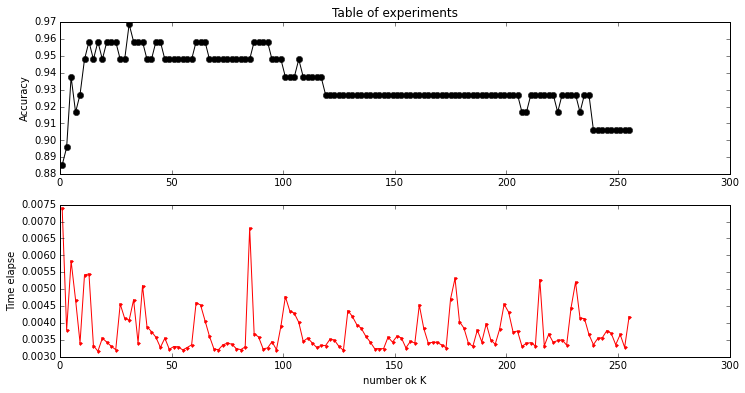

In [24]:
demo_4_3(res[2], res_test[2])

In [25]:
def preparePlotKNN(train, test, k):
    ret = np.copy(test)
    for i in range(test.shape[1]):
        inds = knn_rex.k_nearest_neighbors_par(train[0:2,:],test[0:2,i],k)
        if np.multiply(np.sum(train[2,inds]),test[2,i])< 0:#if the KNN votes is not the same sign as lable on test data.
            if(test[2,i]<0):
                ret[2,i]=-2 #-2, -1 is judged as 1
            else:
                ret[2,i]=2
    return ret


def demo_4_plots2gether(X_t, x, y, X, X_pos, X_neg):
    # plotting
    fig = plt.figure(figsize=(12, 12))

    # limits for the axes
    X_ = np.vstack((x, y))  # only the measurements; data is col-wise
    xmin, ymin = X_.min(axis=1)
    xmax, ymax = X_.max(axis=1)
    xlim = [xmin-25, xmax+25]  # purely for looks
    ylim = [ymin-25, ymax+25]

    k_num = 9 # 1,3,5
    KNNPlotList=[]
    axsList=[]
    for i in range(k_num):    
        KNNPlotList.append(preparePlotKNN(X,X_t,i*2+1))
        axsList.append(fig.add_subplot(3,3,i+1))
        Temp = pre_rex.split_data(KNNPlotList[i], True, 2, [1.0, -1.0, 2.0, -2.0])
        plt_rex.plot2d(Temp[0], colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
                show=False, axs=axsList[i], set_aspect_equal=False)
        plt_rex.plot2d(Temp[1], colwise_data=True, hatch='r*', x_lim=xlim, y_lim=ylim, 
                show=False, axs=axsList[i], set_aspect_equal=False)
        plt_rex.plot2d(Temp[2], colwise_data=True, hatch='yo', x_lim=xlim, y_lim=ylim, 
                show=False, axs=axsList[i], set_aspect_equal=False)
        plt_rex.plot2d(Temp[3], colwise_data=True, hatch='y*', x_lim=xlim, y_lim=ylim, 
                show=False, axs=axsList[i], set_aspect_equal=False, title=2*i+1)

### Plot together
- We plot the prediction result and the real result together
- The Blue circle (0) represents data with label 1
- The Red star (*) represents data label -1
- The Yellow circle (0) represents data with label 1, with prediction fail
- The Yellow star (*) represents data label -1, with prediction fail

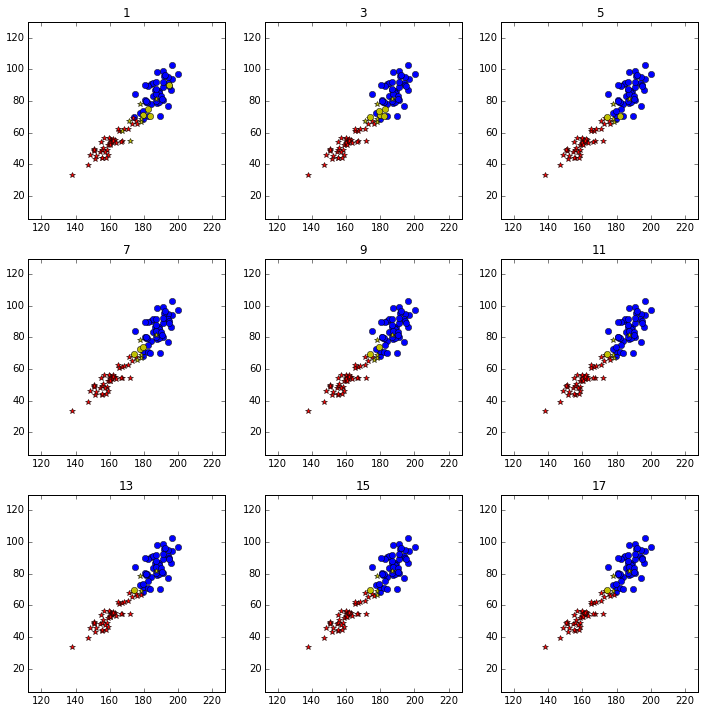

In [26]:
demo_4_plots2gether(res_test[2], *res)

###  2. Determin the Run Time on Nearest Neighbor
#### First define the test function
- We have 4 methods
    - Näive approch
    - From Prof's paper, use the norm
    - From Prof's paper
    - From Prof's paper

In [27]:
def nearest_neighbor_method0(X,q):
    m, n = X.shape
    sqr = np.square(np.subtract(X.T,q))# (X-q)^2
    _sum = np.add(sqr[:,0],sqr[:,1]) #sum up the x and y
    return np.argmin(_sum) # retun the argmin

def nearest_neighbor_method1(X, q):
    m, n = X.shape
    minindx = 0
    mindist = np.inf
    for i in range(n):
        dist = la.norm(X[:,i] - q)
        if dist <= mindist:
            mindist = dist
            minindx = i
    return minindx

def nearest_neighbor_method2(X, q):
    m, n = X.shape
    return np.argmin(np.sum((X-q.reshape(m,1))**2, axis=0))

def nearest_neighbor_method3(X, q):
    X = X.T
    return np.argmin(np.sum((X - q)**2, axis=1))

In [28]:
def test1NNtime(data, method):
#     start = timeit.default_timer()
    for i in range(data.shape[1]):
        data_=np.delete(data, i, axis=1)##Delete itself
        if method==0:
            start = timeit.default_timer()
            inds = knn_rex.nearest_neighbor_method1(data_[0:2,:],data[0:2,i])
            stop = timeit.default_timer()
        elif method==1:
            start = timeit.default_timer()
            inds = knn_rex.nearest_neighbor_method1(data_[0:2,:],data[0:2,i])
            stop = timeit.default_timer()
        elif method==2:
            start = timeit.default_timer()
            inds = knn_rex.nearest_neighbor_method2(data_[0:2,:],data[0:2,i])
            stop = timeit.default_timer()
        elif method==3:
            start = timeit.default_timer()
            inds = knn_rex.nearest_neighbor_method3(data_[0:2,:],data[0:2,i])
            stop = timeit.default_timer()
#     stop = timeit.default_timer()
    return (stop-start)


def demo_4_test1NNtime(X_t):
    for i in range(4):
        print("Time for method ",i, " :","{0:.15f}".format(test1NNtime(X_t,i)))

In [29]:
demo_4_test1NNtime(res_test[2])

Time for method  0  : 0.001576594018843
Time for method  1  : 0.001050732040312
Time for method  2  : 0.000024456996471
Time for method  3  : 0.000016675970983


## Task 2.5
### Computing KDTree

### 1 : Construct and plot k = 2 KDTree for `data2-train.dat`

- 2 Variants on selecting slicing dimension

    1. alternate between the x and the y dimension
    
    2. split the data along the dimension of higher variance
    
    
- 3 Variants on computing sliping points

    1. split at the median of the data
    
    2. split at the midpoint of the data
    
    3. split at the midpoint of the data with sliding (S. Maneewongvatana and David M. Mount, 1999)
    

In [30]:
def demo_5_read():
    dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

    data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

    x = np.array([d[0] for d in data])#x
    y = np.array([d[1] for d in data])#y
    lable = np.array([d[2] for d in data])#label

    X = np.vstack((x, y, lable))  # data is going to be column-wise
    X.shape
    X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
    print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])
    
    return(x, y, X, X_pos, X_neg)
    
def demo_5_construct(x, y, X, X_pos, X_neg):
    TreeList=[]
    dim, splt = 2,3
    for i in range(dim):
        for j in range(splt):
            #print("dim,splt",dim, splt)
            TreeList.append(kd_rex.KDTree(X[0:2,:].T,0,i,j))
            
    kd_rex.KDTreePlot2D(x,y,TreeList,dim,splt)

Positive : 128 ; Negative : 128


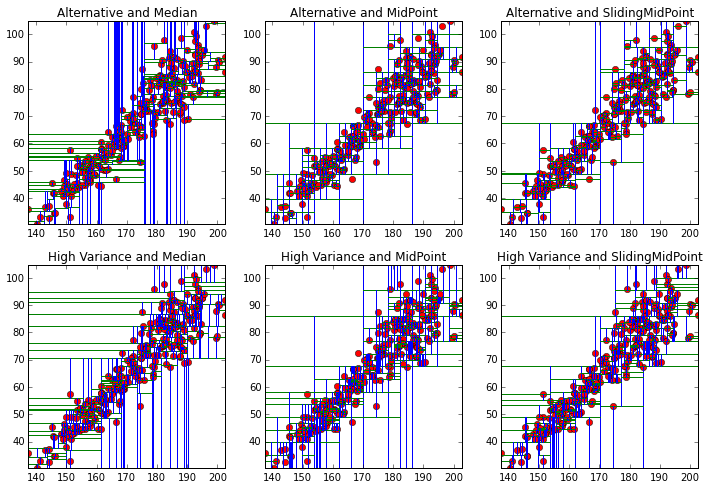

In [31]:
res = demo_5_read()
demo_5_construct(*res)

In [32]:
def demo_5_read_test():
    #data2-test
    dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string
    data = np.loadtxt('data/data2-test.dat', dtype=dt, comments='#', delimiter=None)

    x_t = np.array([d[0] for d in data])#x
    y_t = np.array([d[1] for d in data])#y
    lable_t = np.array([d[2] for d in data])#label

    X_t = np.vstack((x_t, y_t, lable_t))  # data is going to be column-wise
    X_t.shape

    # split
    X_t_pos, X_t_neg = pre_rex.split_data(X_t, True, 2, [1.0, -1.0])
    print("Positive :", X_t_pos.shape[1], "; Negative :", X_t_neg.shape[1])
    
    return (x_t, y_t, X_t, X_t_pos, X_t_neg)

def demo_5_time(X, x_t, y_t, X_t, X_t_pos, X_t_neg):
    tree = ss.KDTree(X[0:2,:].T,4)
    k=1

    start = timeit.default_timer()
    tree.query(X_t[0:2,:].T,k)
    end = timeit.default_timer()

    print("Overall run time:", end-start, "seconds")

### 2: Determine overall run time 

For computing the 1-nearest neighbor of every data in `data2-test.dat`

In [33]:
res_test = demo_5_read_test()
print()
demo_5_time(res[2], *res_test)

Positive : 48 ; Negative : 48

Overall run time: 0.02441302197985351 seconds


## References

- Lecture Slides
- `docs.scipy.org`
- C.Bauckhage, “NumPy / SciPy Recipes for Data Science: Regularized Least Squares Optimization”, researchgate.net
- C.Bauckhage, "NumPy / SciPy Recipes for Data Science: Computing Nearest Neighbors", researchgate.net
- S. Maneewongvatana and David M. Mount, 1999
- It’s okay to be skinny, if your friends are fat: [Sliding Midpoint](http://www.cs.umd.edu/~mount/Papers/cgc99-smpack.pdf)

***

# Thanks
